In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load the dataset
data = pd.read_csv('C:\\Users\\gaura\\Downloads\\augmented_historical_ais_data.csv')

# Convert 'TIMESTAMP' to datetime format
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])

# Extract time features
data['HOUR'] = data['TIMESTAMP'].dt.hour
data['DAY_OF_WEEK'] = data['TIMESTAMP'].dt.dayofweek
data['MONTH'] = data['TIMESTAMP'].dt.month


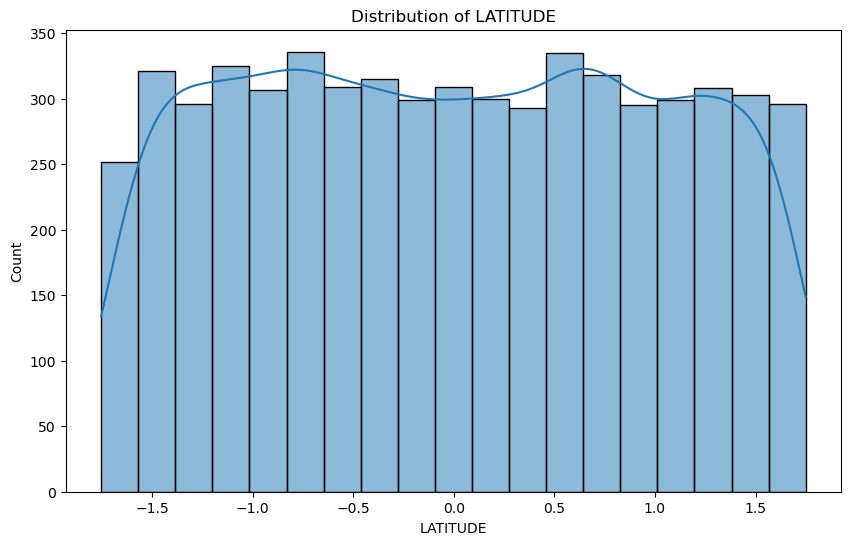

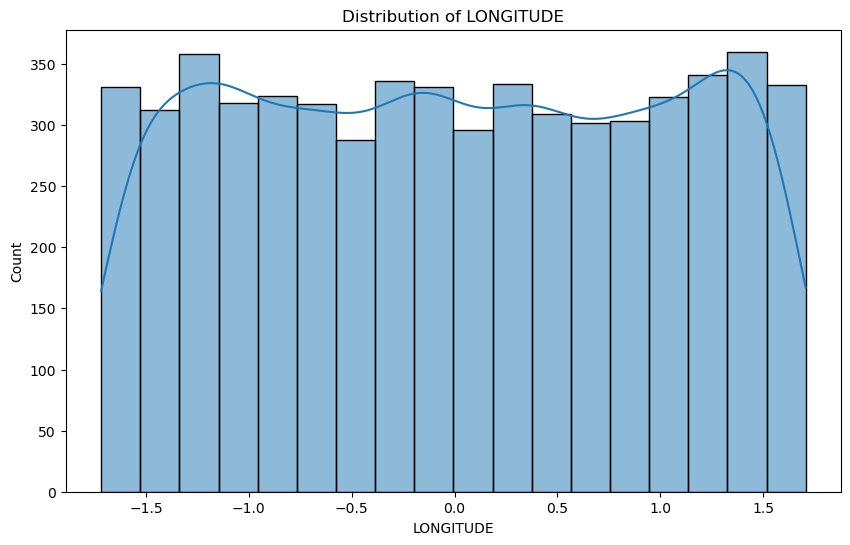

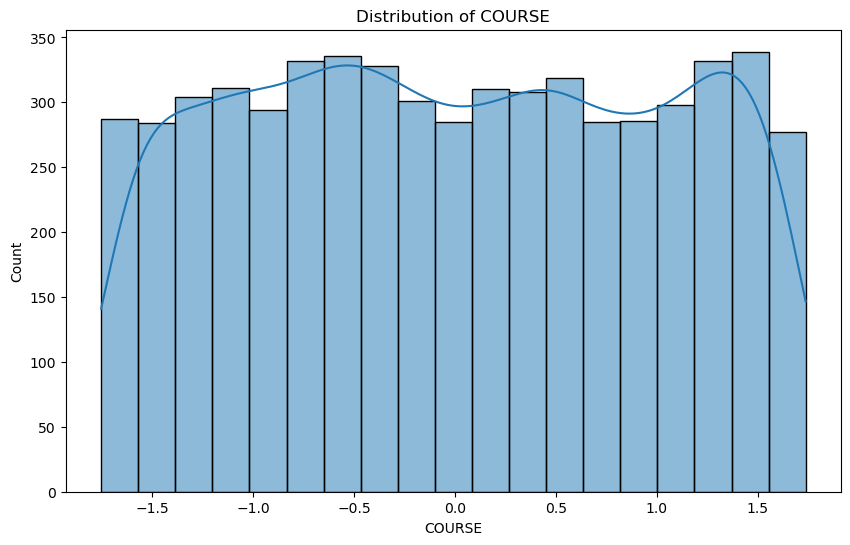

In [56]:
# Distribution of LATITUDE
plt.figure(figsize=(10, 6))
sns.histplot(data['LATITUDE'], kde=True)
plt.title('Distribution of LATITUDE')
plt.show()

# Distribution of LONGITUDE
plt.figure(figsize=(10, 6))
sns.histplot(data['LONGITUDE'], kde=True)
plt.title('Distribution of LONGITUDE')
plt.show()

# Distribution of COURSE
plt.figure(figsize=(10, 6))
sns.histplot(data['COURSE'], kde=True)
plt.title('Distribution of COURSE')
plt.show()


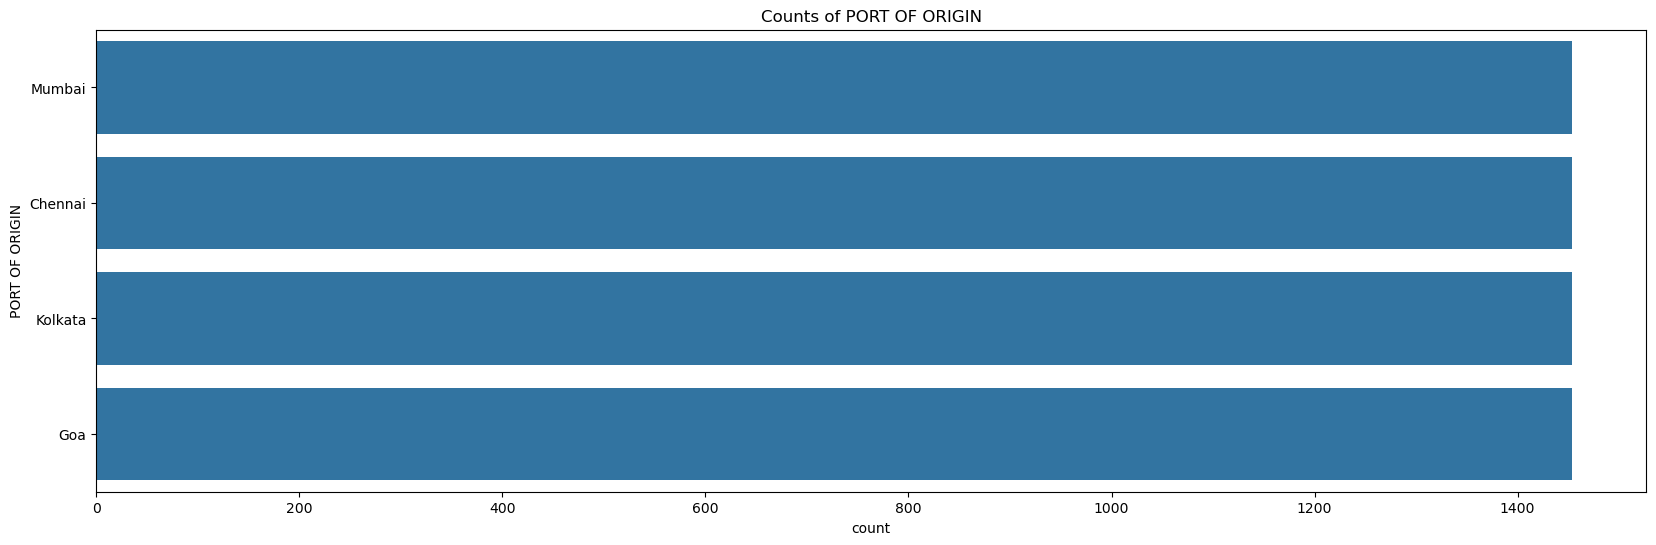

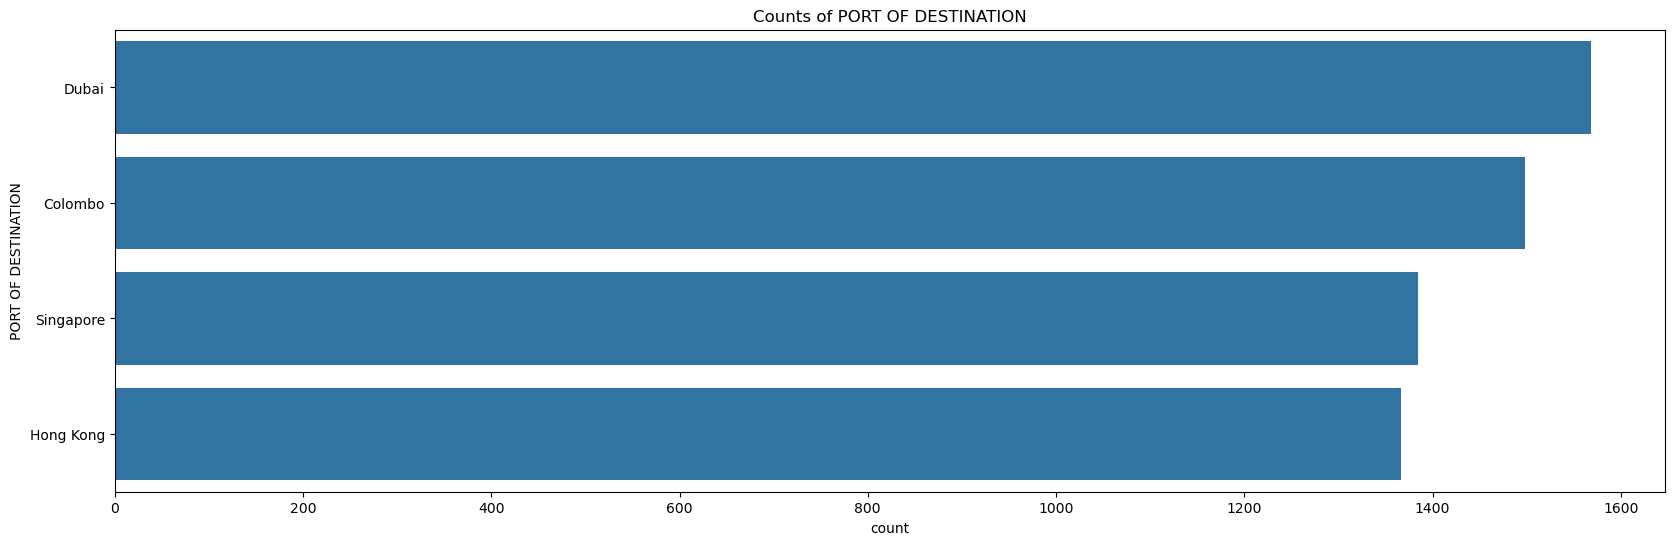

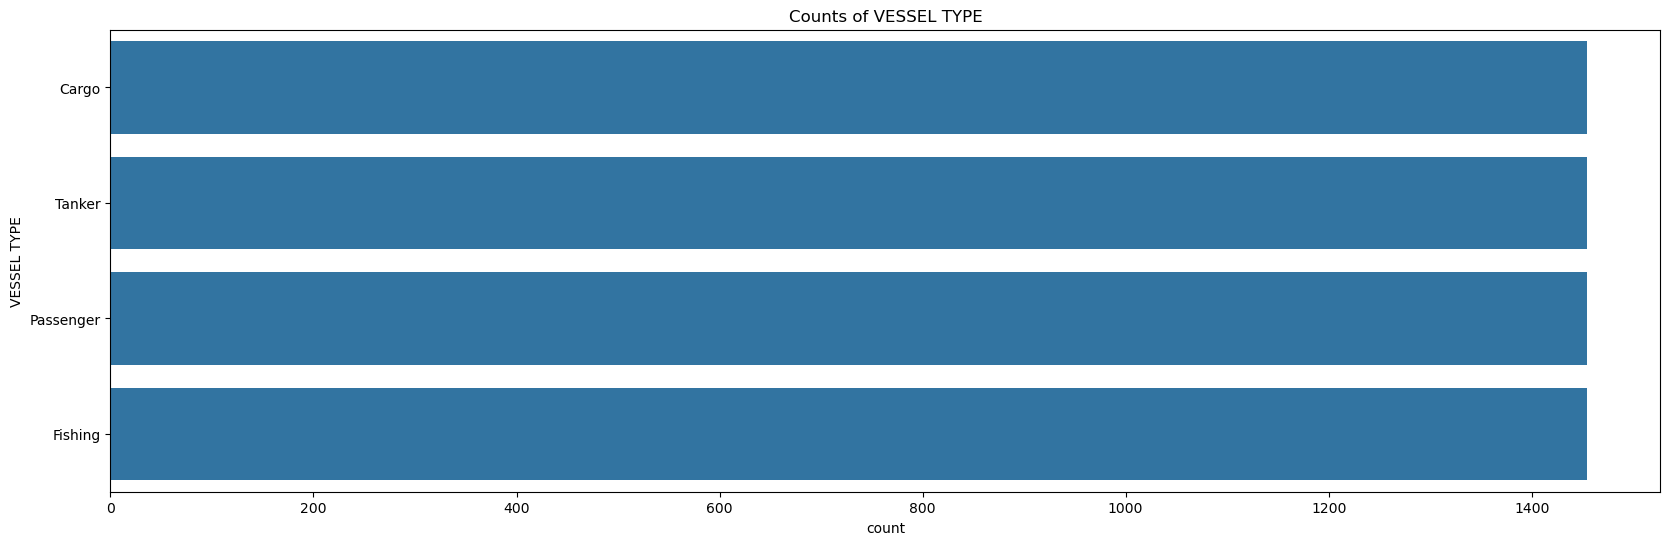

In [58]:
# Count plot for PORT OF ORIGIN
plt.figure(figsize=(20, 6))
sns.countplot(y='PORT OF ORIGIN', data=data, order=data['PORT OF ORIGIN'].value_counts().index)
plt.title('Counts of PORT OF ORIGIN')
plt.show()

# Count plot for PORT OF DESTINATION
plt.figure(figsize=(20, 6))
sns.countplot(y='PORT OF DESTINATION', data=data, order=data['PORT OF DESTINATION'].value_counts().index)
plt.title('Counts of PORT OF DESTINATION')
plt.show()

# Count plot for VESSEL TYPE
plt.figure(figsize=(20, 6))
sns.countplot(y='VESSEL TYPE', data=data, order=data['VESSEL TYPE'].value_counts().index)
plt.title('Counts of VESSEL TYPE')
plt.show()


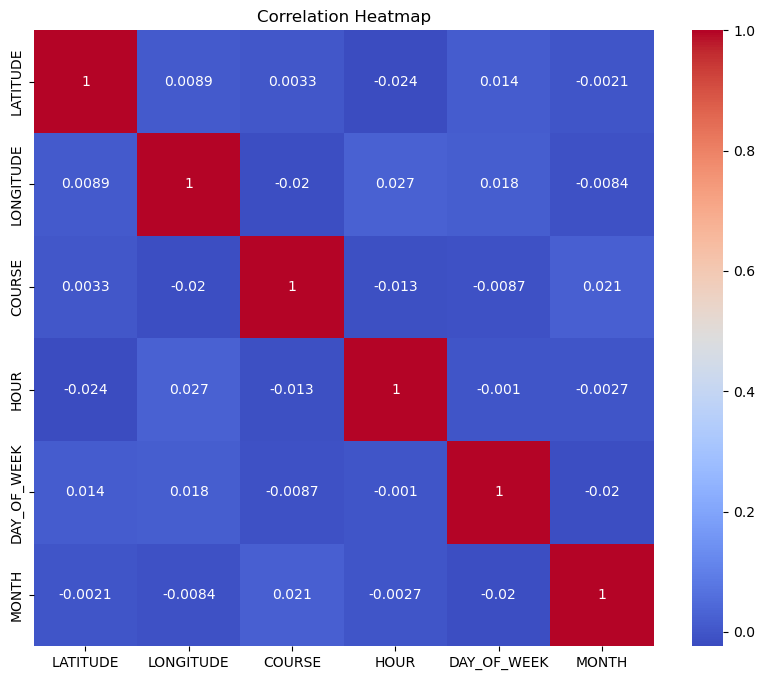

In [60]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[['LATITUDE', 'LONGITUDE', 'COURSE', 'HOUR', 'DAY_OF_WEEK', 'MONTH']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



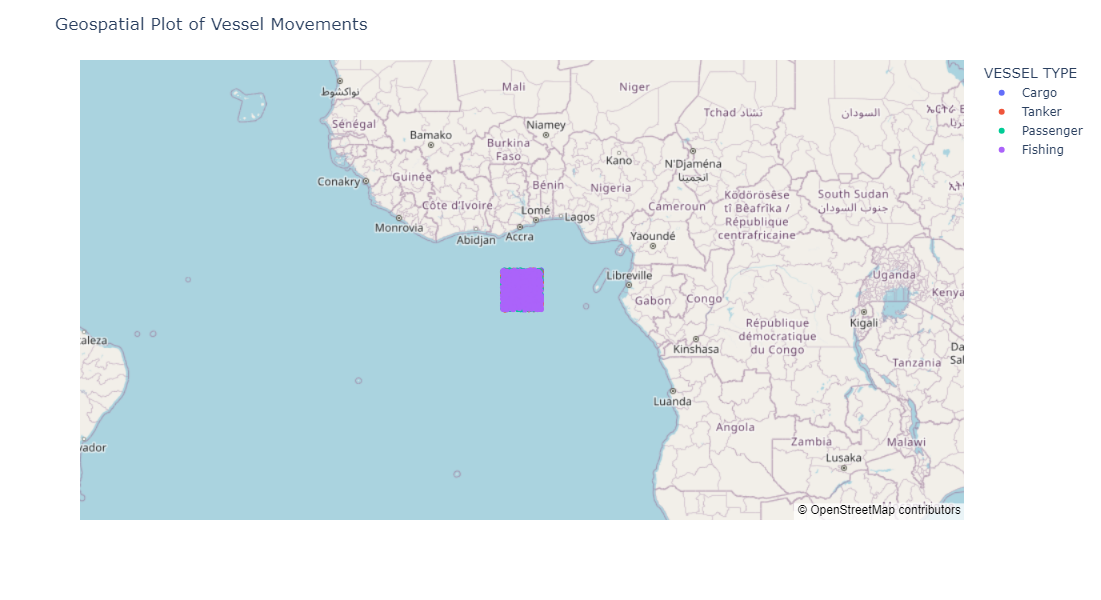

In [62]:
# Geospatial plot of vessel movements
fig = px.scatter_mapbox(data, lat="LATITUDE", lon="LONGITUDE", hover_name="MMSI",
                        hover_data=["PORT OF ORIGIN", "PORT OF DESTINATION", "VESSEL TYPE"],
                        color="VESSEL TYPE", zoom=3, height=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Geospatial Plot of Vessel Movements")
fig.show()


C:\Users\gaura\AppData\Local\Temp\ipykernel_24884\1591377436.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




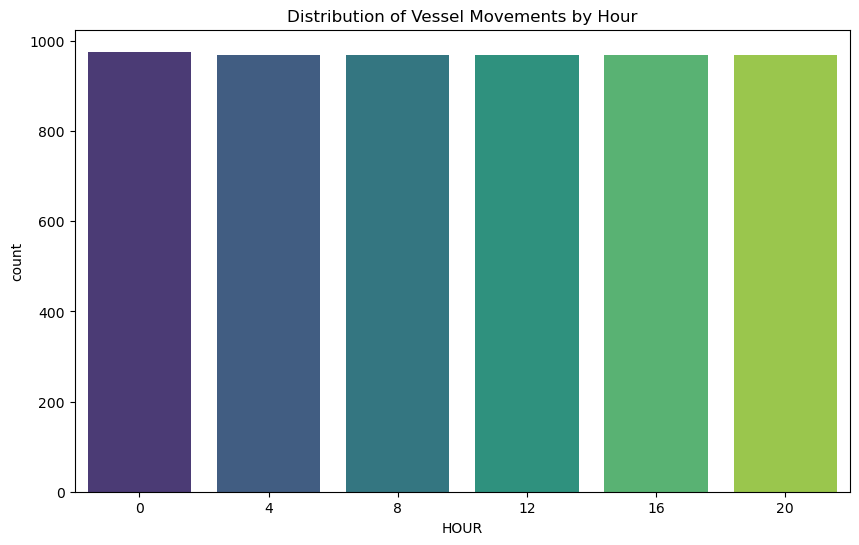

C:\Users\gaura\AppData\Local\Temp\ipykernel_24884\1591377436.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




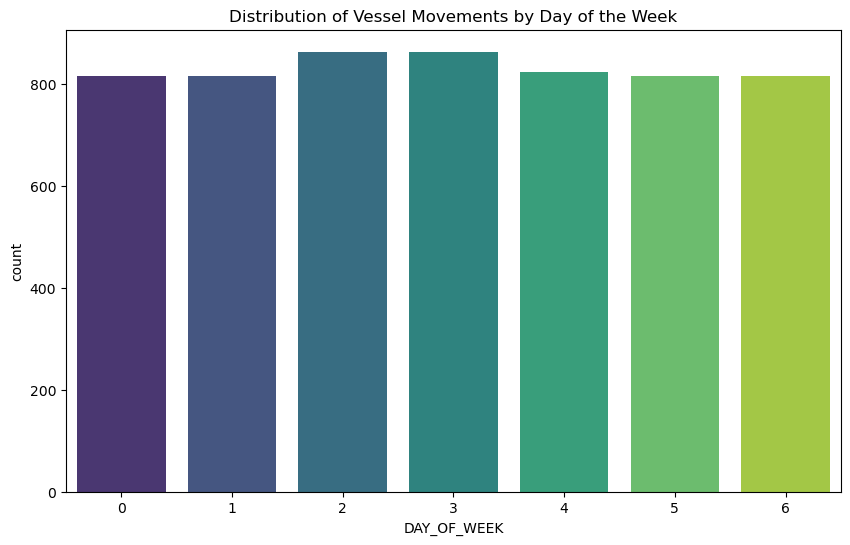

C:\Users\gaura\AppData\Local\Temp\ipykernel_24884\1591377436.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




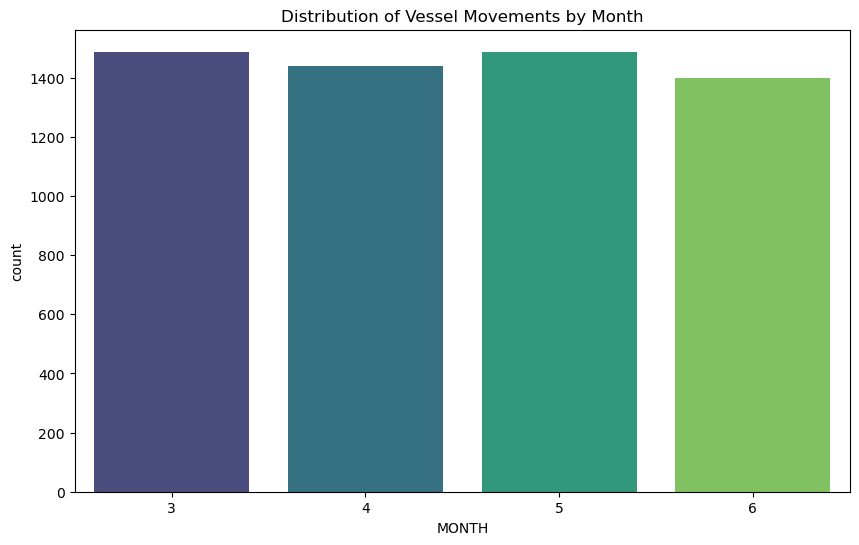

In [19]:
# Distribution of vessel movements by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='HOUR', data=data, palette='viridis')
plt.title('Distribution of Vessel Movements by Hour')
plt.show()

# Distribution of vessel movements by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='DAY_OF_WEEK', data=data, palette='viridis')
plt.title('Distribution of Vessel Movements by Day of the Week')
plt.show()

# Distribution of vessel movements by month
plt.figure(figsize=(10, 6))
sns.countplot(x='MONTH', data=data, palette='viridis')
plt.title('Distribution of Vessel Movements by Month')
plt.show()


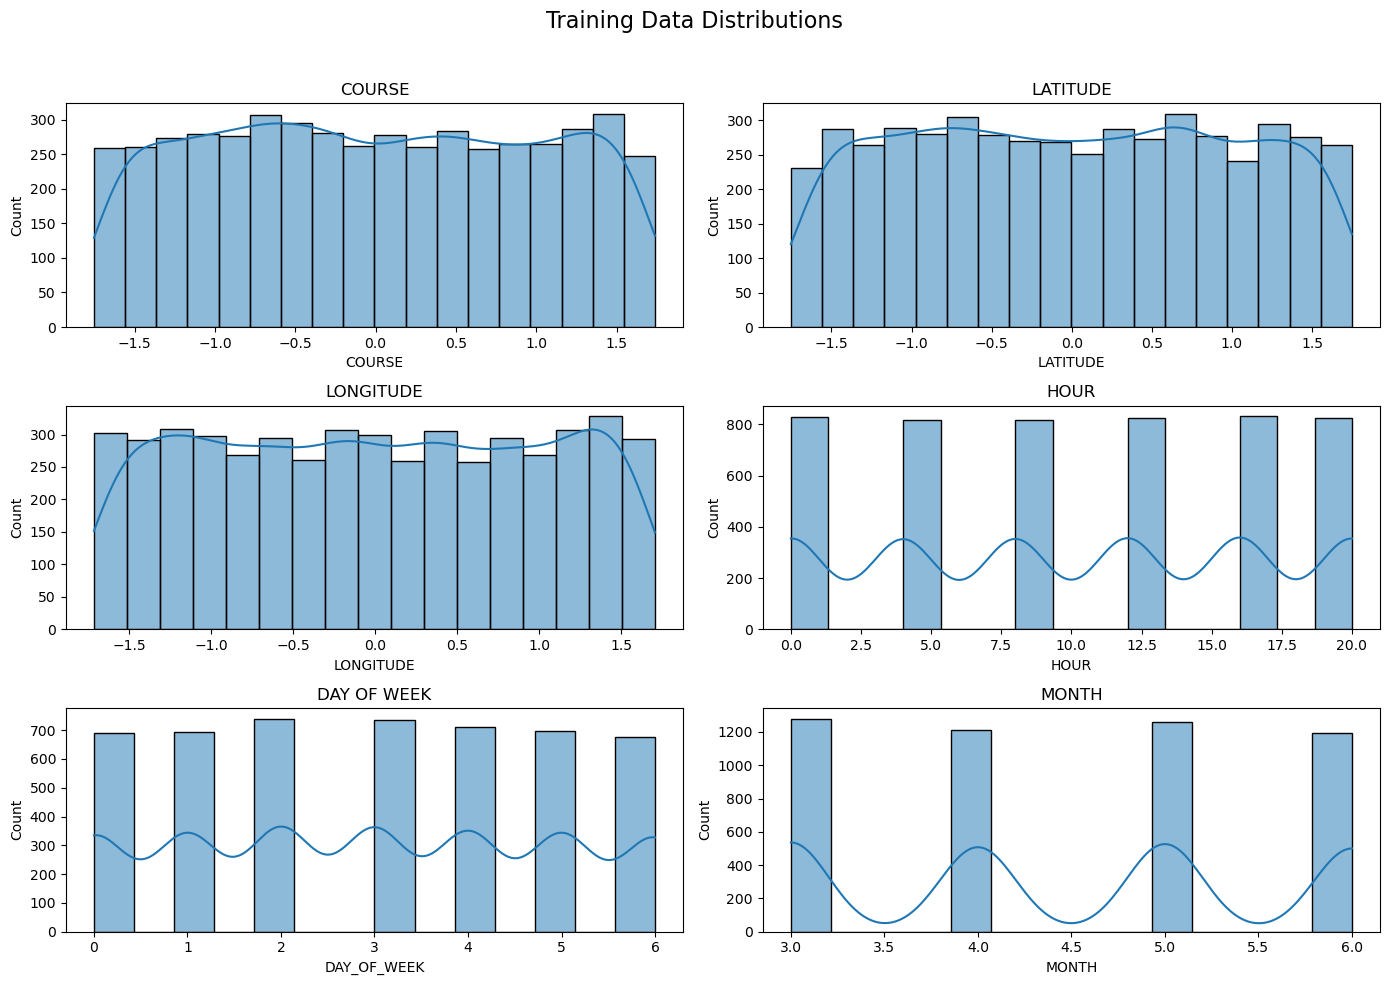

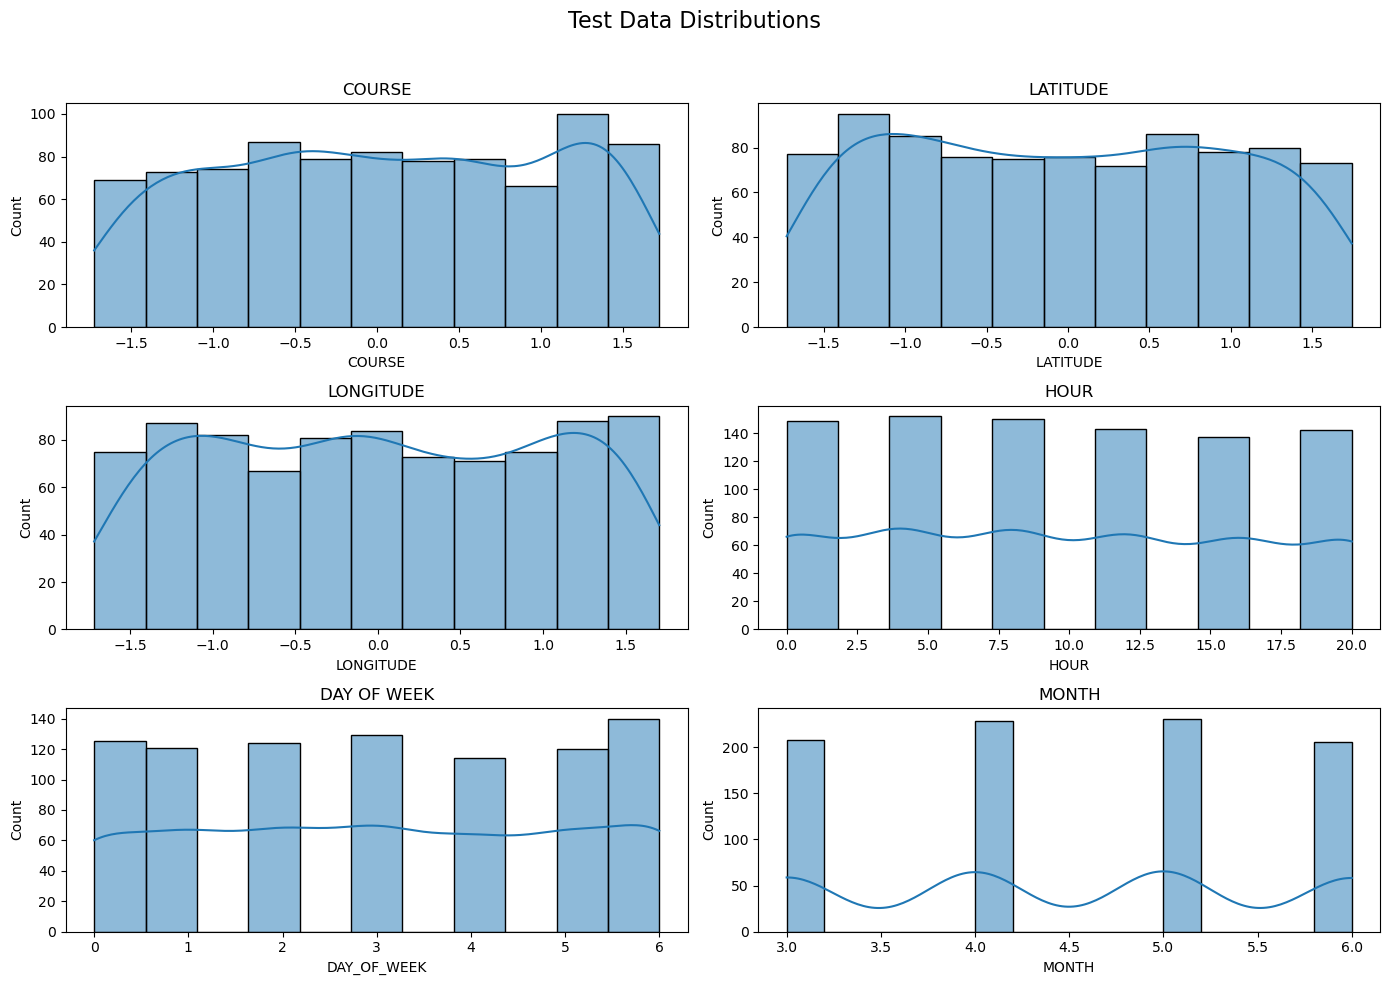

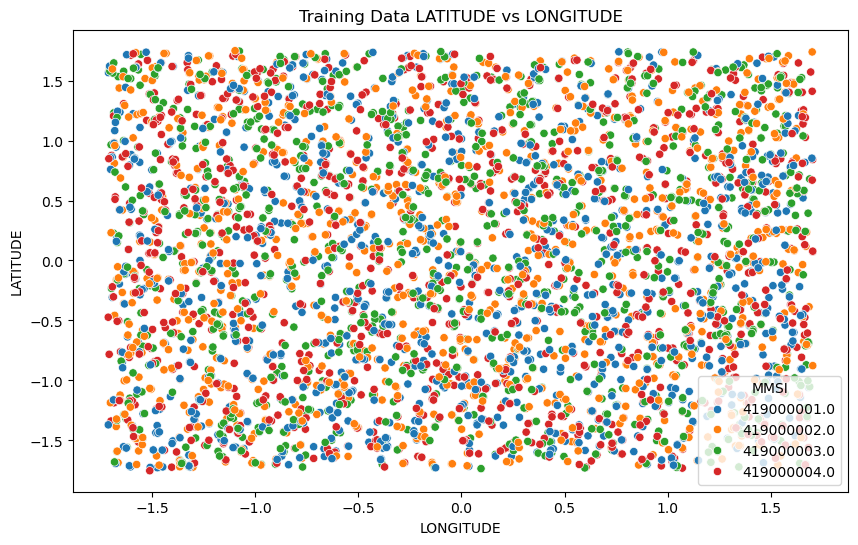

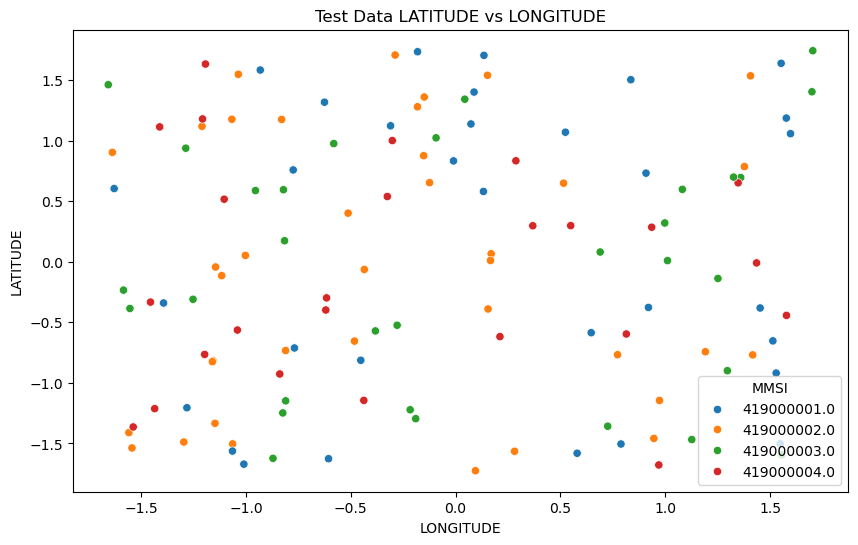

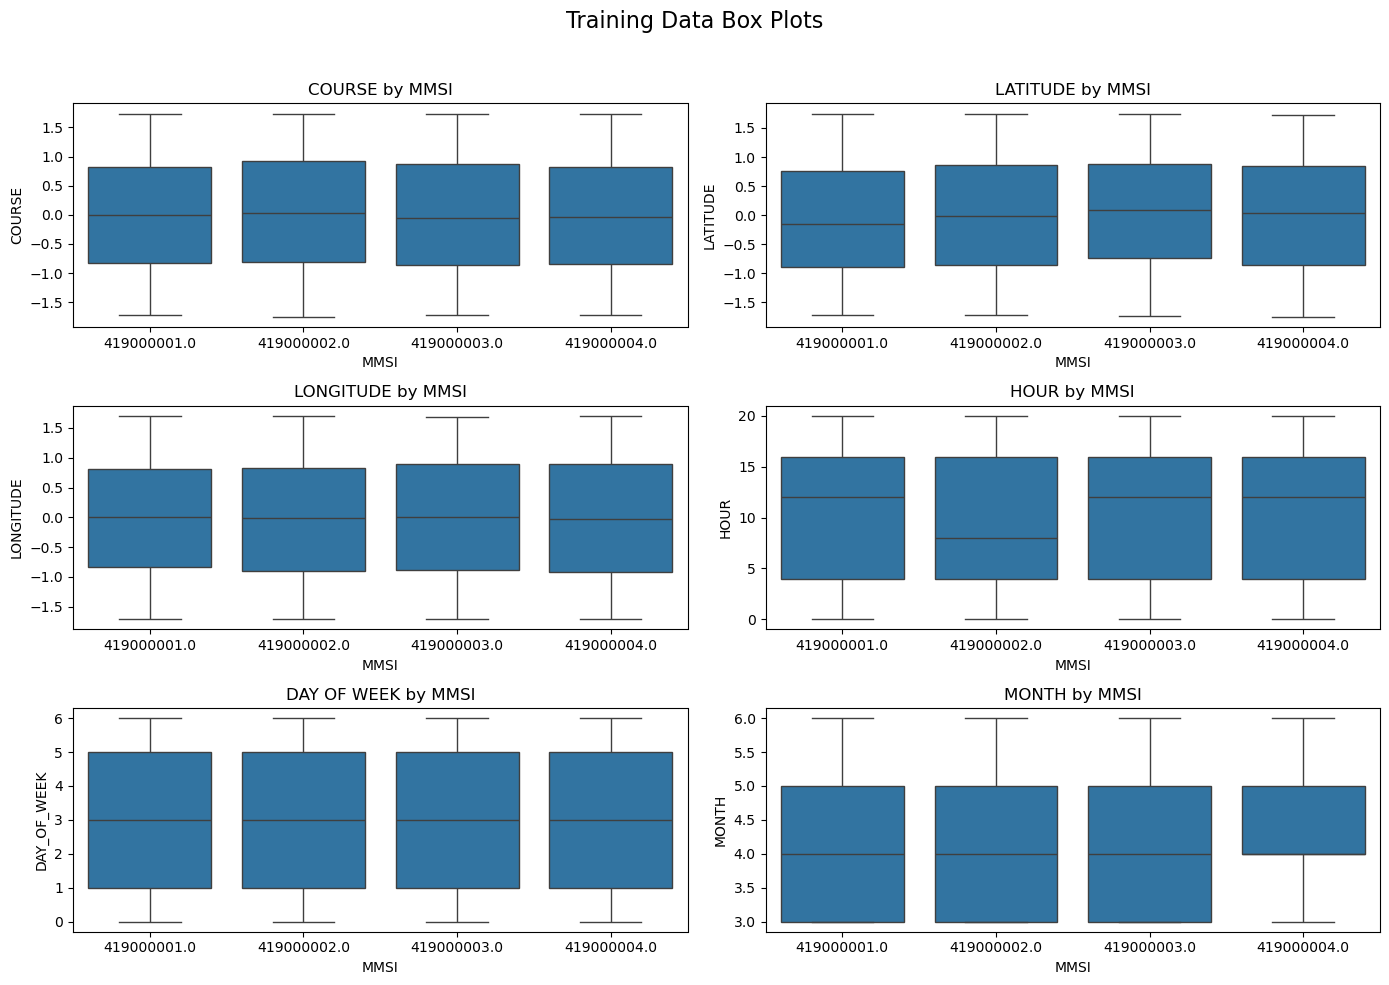

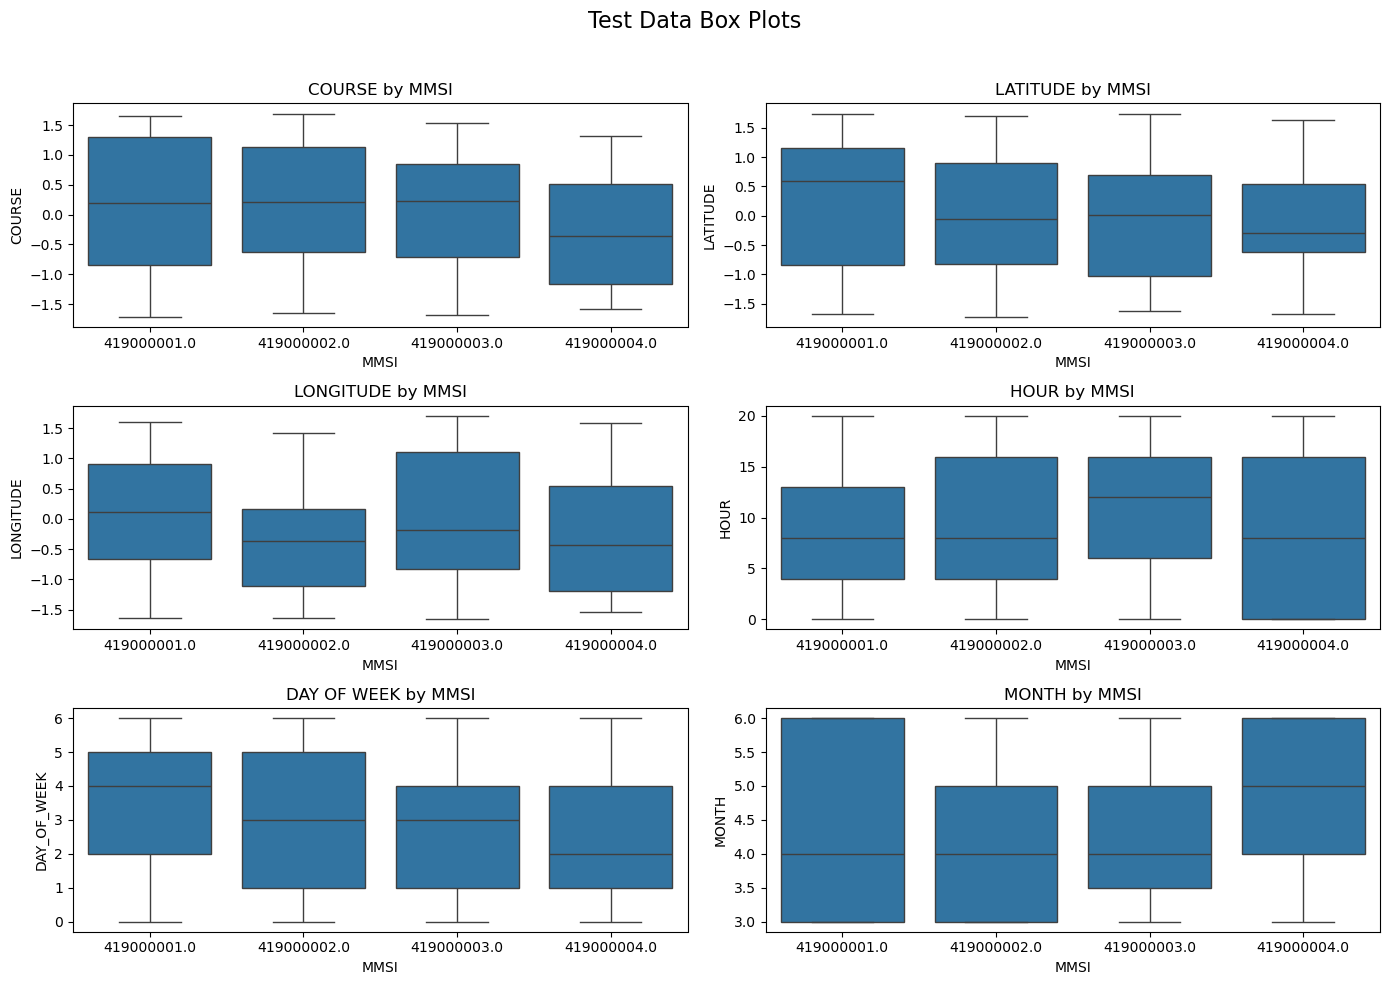

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('C:\\Users\\gaura\\Downloads\\augmented_historical_ais_data.csv')

# Convert 'TIMESTAMP' to datetime format
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])

# Ensure the data is sorted by 'MMSI' and 'TIMESTAMP'
data = data.sort_values(by=['MMSI', 'TIMESTAMP'])

# One-hot encode categorical features
categorical_features = ['PORT OF ORIGIN', 'PORT OF DESTINATION', 'VESSEL TYPE']
data = pd.get_dummies(data, columns=categorical_features)

# Extract time features
data['HOUR'] = data['TIMESTAMP'].dt.hour
data['DAY_OF_WEEK'] = data['TIMESTAMP'].dt.dayofweek
data['MONTH'] = data['TIMESTAMP'].dt.month

# Drop the original 'TIMESTAMP' column
data = data.drop(columns=['TIMESTAMP'])

# Define the target variable and features
X = data[['COURSE', 'LATITUDE', 'LONGITUDE', 'HOUR', 'DAY_OF_WEEK', 'MONTH']]
y = data['MMSI']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# Combine X and y for train and test data
train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
test_data = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

# Plotting function for histograms
def plot_histograms(data, title):
    fig, axes = plt.subplots(3, 2, figsize=(14, 10))
    fig.suptitle(title, fontsize=16)
    sns.histplot(data['COURSE'], kde=True, ax=axes[0, 0]).set_title('COURSE')
    sns.histplot(data['LATITUDE'], kde=True, ax=axes[0, 1]).set_title('LATITUDE')
    sns.histplot(data['LONGITUDE'], kde=True, ax=axes[1, 0]).set_title('LONGITUDE')
    sns.histplot(data['HOUR'], kde=True, ax=axes[1, 1]).set_title('HOUR')
    sns.histplot(data['DAY_OF_WEEK'], kde=True, ax=axes[2, 0]).set_title('DAY OF WEEK')
    sns.histplot(data['MONTH'], kde=True, ax=axes[2, 1]).set_title('MONTH')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plotting histograms
plot_histograms(train_data, 'Training Data Distributions')
plot_histograms(test_data, 'Test Data Distributions')

# Scatter plot for LATITUDE vs LONGITUDE
def plot_scatter(data, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='MMSI', data=data, palette='tab10')
    plt.title(title)
    plt.show()

# Scatter plots
plot_scatter(train_data, 'Training Data LATITUDE vs LONGITUDE')
plot_scatter(test_data, 'Test Data LATITUDE vs LONGITUDE')

# Box plot function for features grouped by MMSI
def plot_boxplots(data, title):
    fig, axes = plt.subplots(3, 2, figsize=(14, 10))
    fig.suptitle(title, fontsize=16)
    sns.boxplot(x='MMSI', y='COURSE', data=data, ax=axes[0, 0]).set_title('COURSE by MMSI')
    sns.boxplot(x='MMSI', y='LATITUDE', data=data, ax=axes[0, 1]).set_title('LATITUDE by MMSI')
    sns.boxplot(x='MMSI', y='LONGITUDE', data=data, ax=axes[1, 0]).set_title('LONGITUDE by MMSI')
    sns.boxplot(x='MMSI', y='HOUR', data=data, ax=axes[1, 1]).set_title('HOUR by MMSI')
    sns.boxplot(x='MMSI', y='DAY_OF_WEEK', data=data, ax=axes[2, 0]).set_title('DAY OF WEEK by MMSI')
    sns.boxplot(x='MMSI', y='MONTH', data=data, ax=axes[2, 1]).set_title('MONTH by MMSI')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Box plots
plot_boxplots(train_data, 'Training Data Box Plots')
plot_boxplots(test_data, 'Test Data Box Plots')


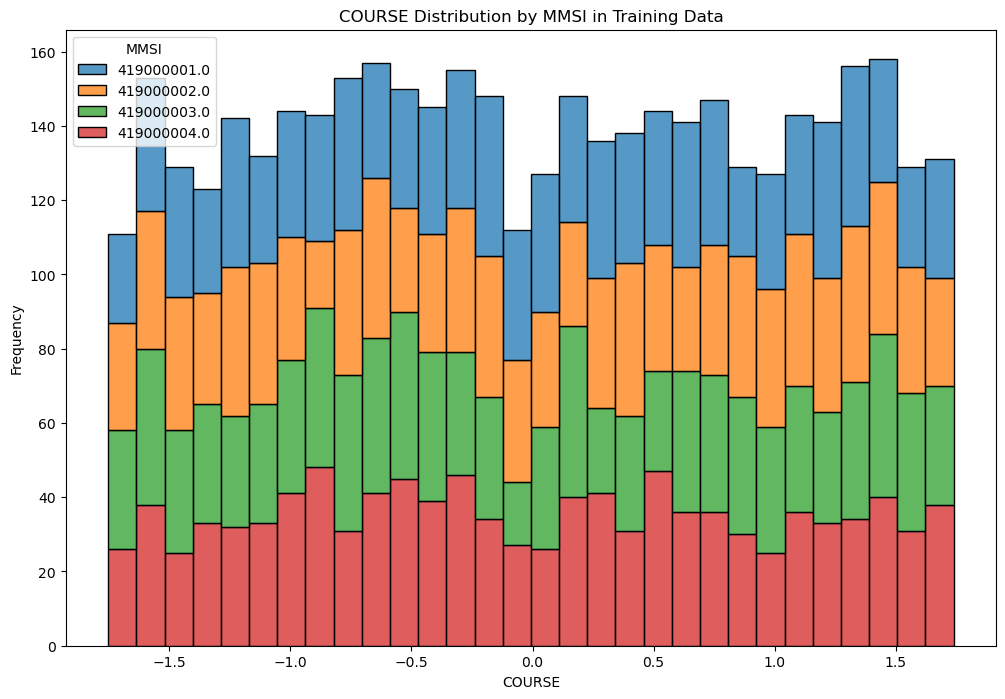

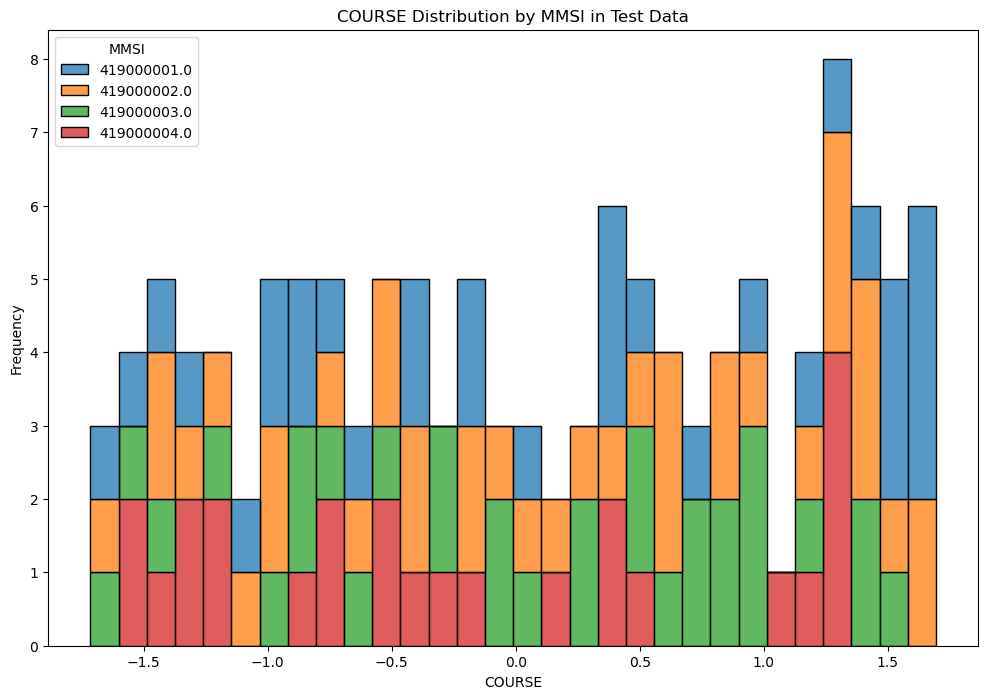

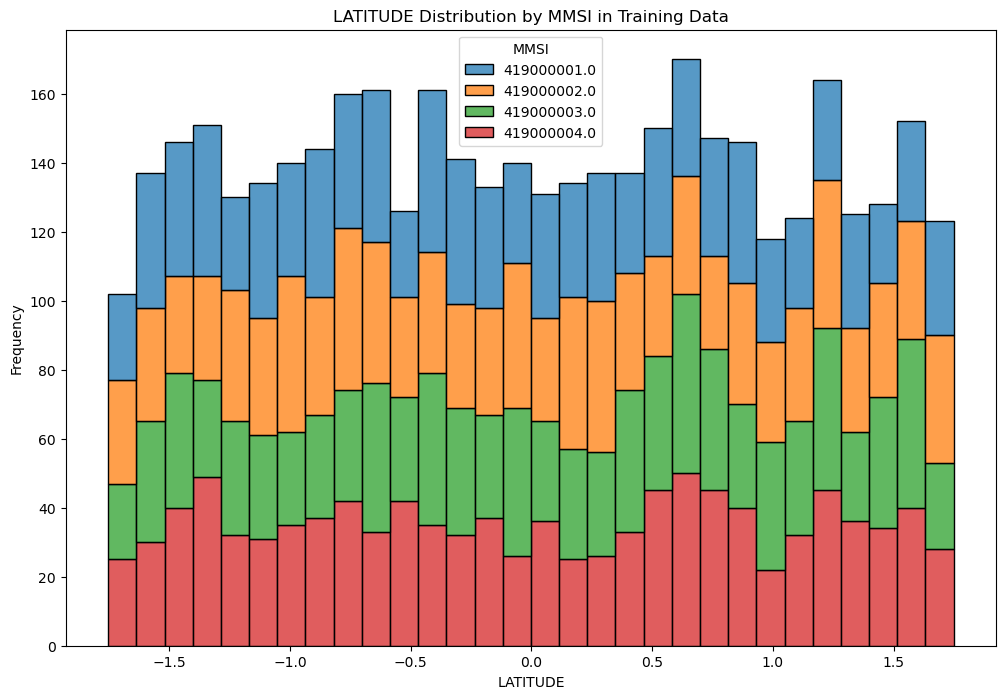

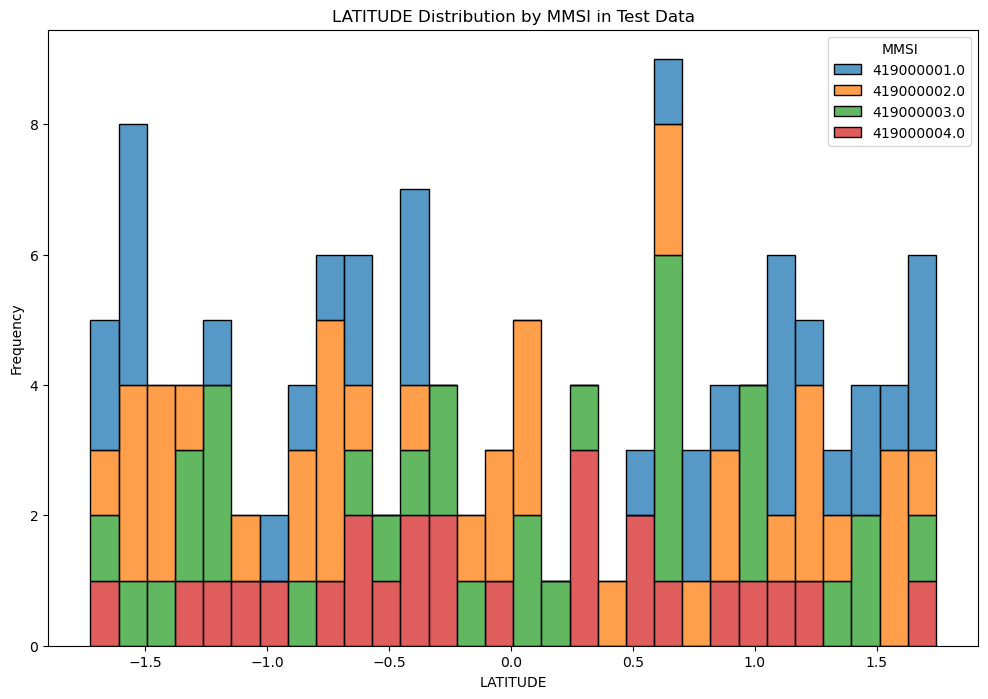

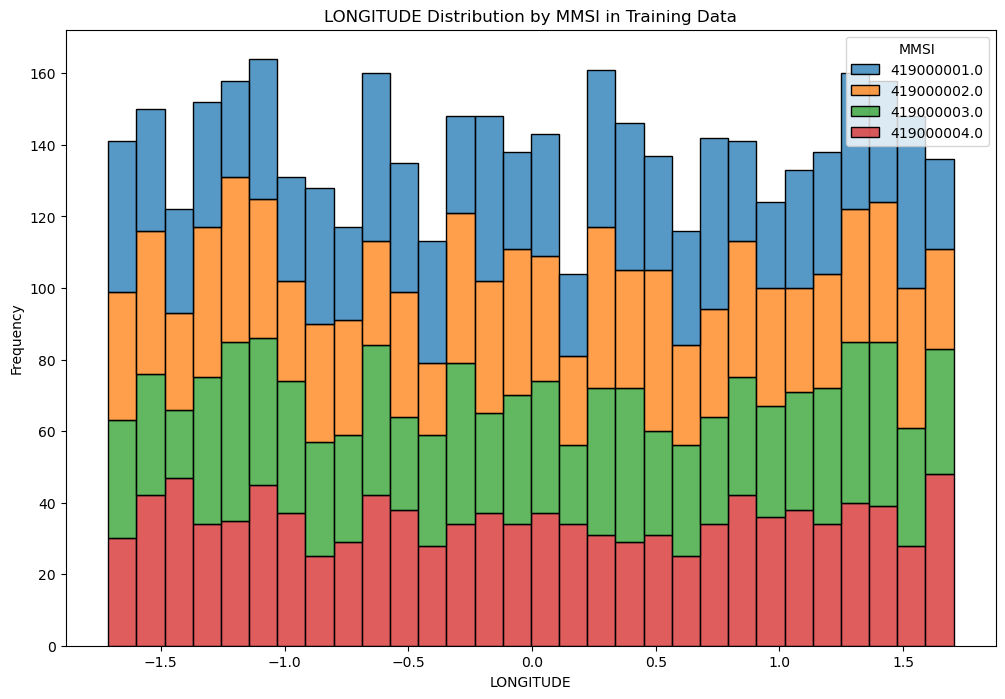

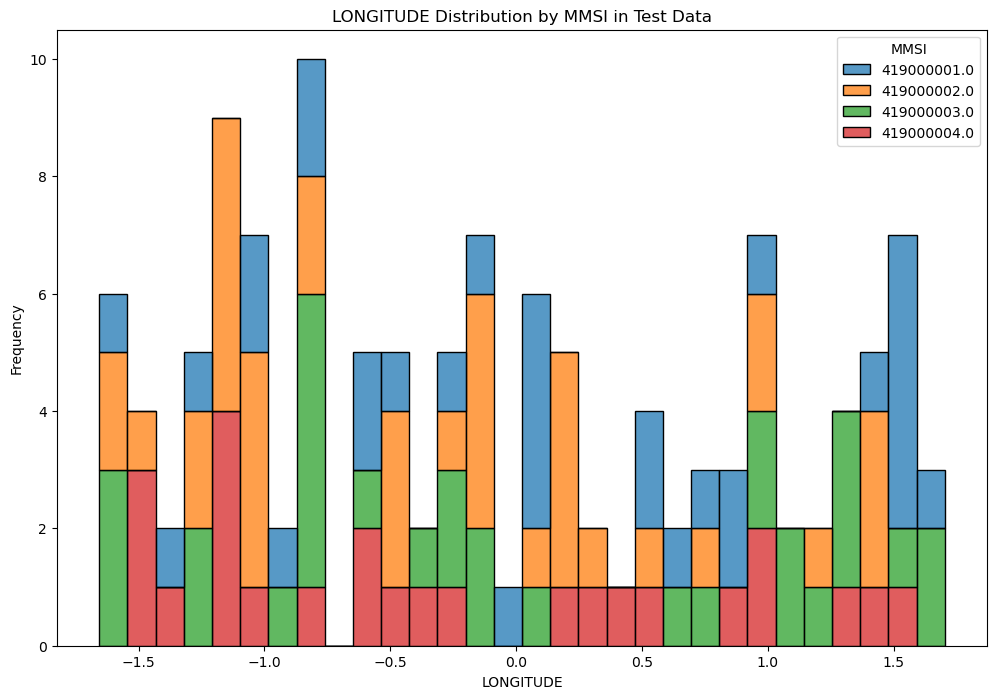

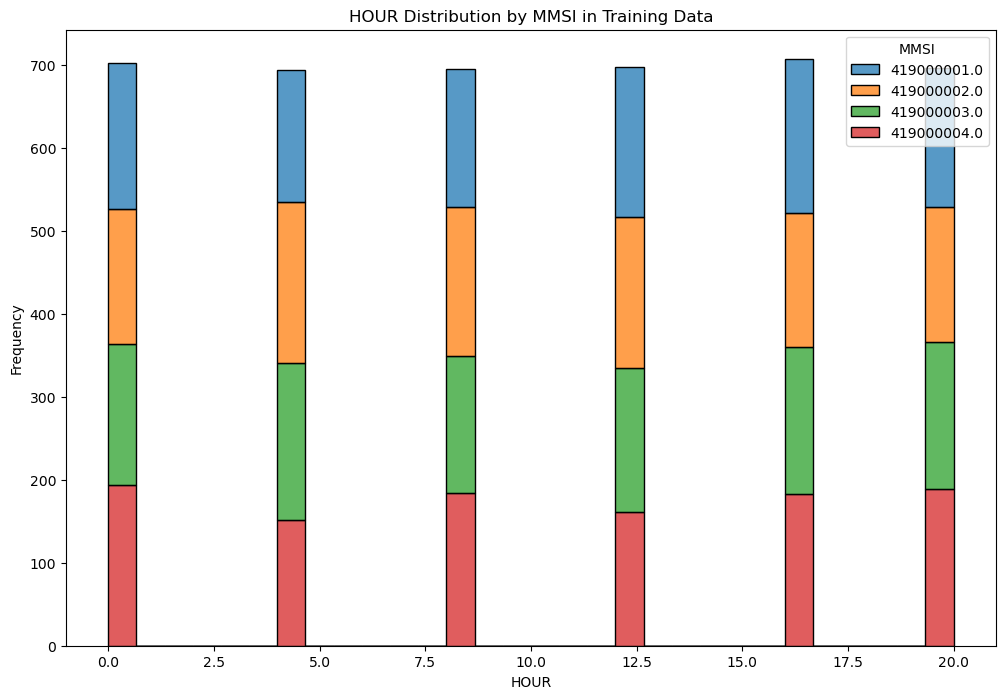

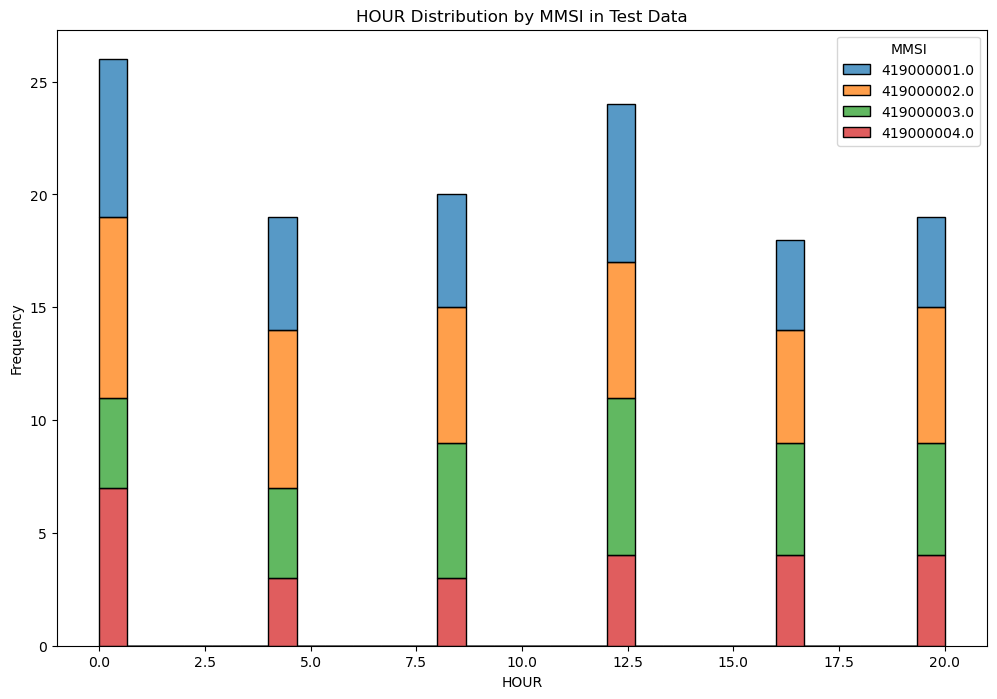

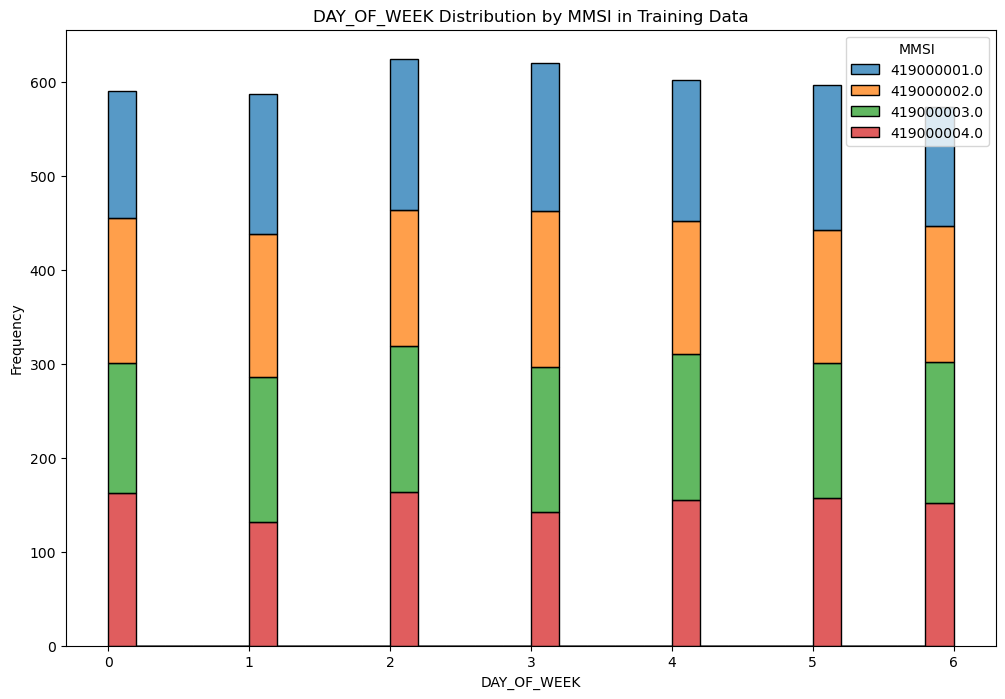

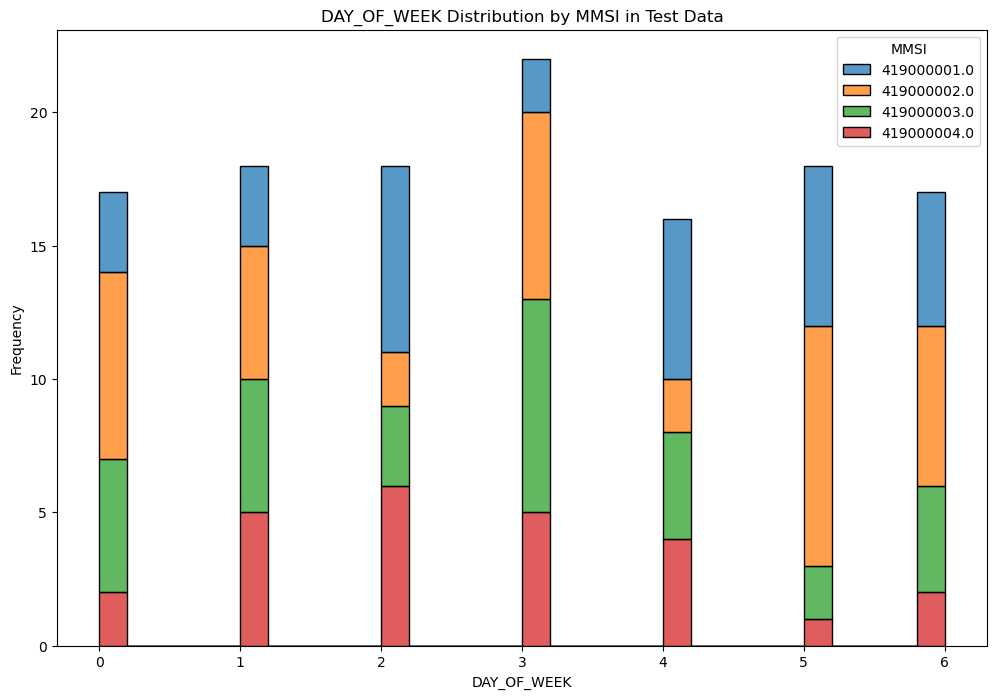

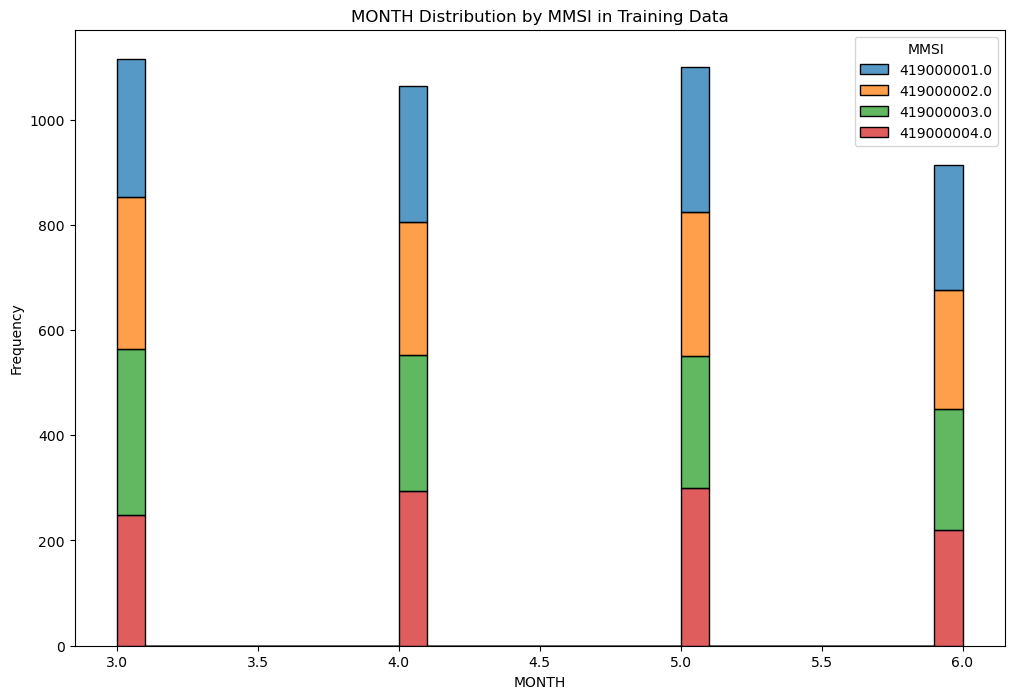

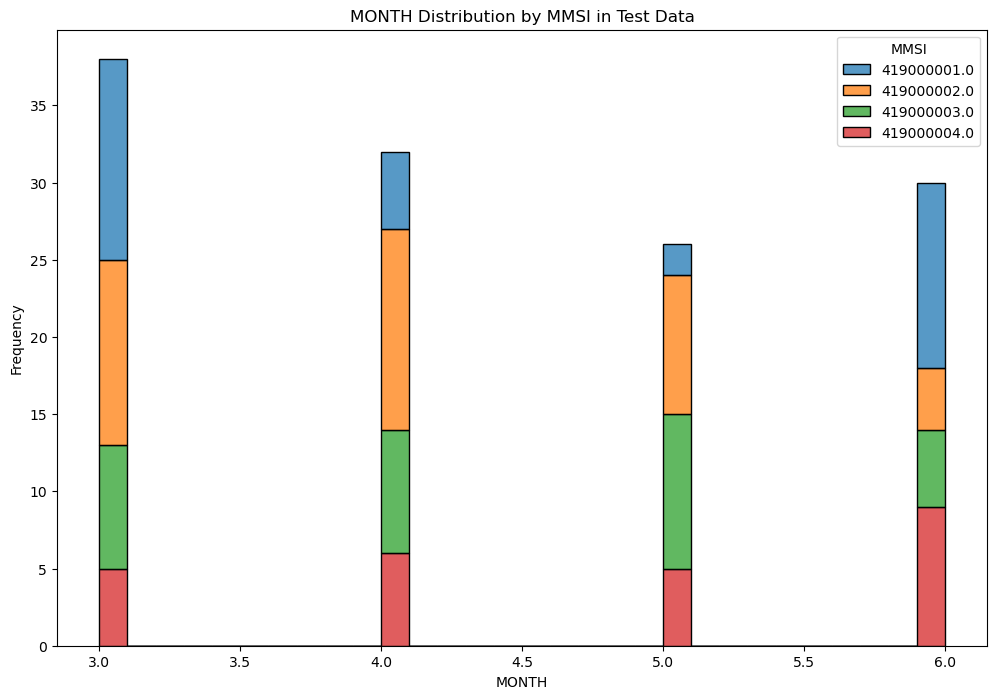

In [48]:
def plot_feature_histograms(data, feature, title):
    plt.figure(figsize=(12, 8))
    sns.histplot(data, x=feature, hue='MMSI', multiple='stack', palette='tab10', bins=30)
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

features = ['COURSE', 'LATITUDE', 'LONGITUDE', 'HOUR', 'DAY_OF_WEEK', 'MONTH']
for feature in features:
    plot_feature_histograms(train_data, feature, f'{feature} Distribution by MMSI in Training Data')
    plot_feature_histograms(test_data, feature, f'{feature} Distribution by MMSI in Test Data')
